# Week 1: Dataset & Feature Understanding
## SentinelX - Phishing Detection Project

**Objective:** Understand the UCI Phishing Websites Dataset
- No model training
- Focus on data exploration
- Prepare for Week 2 feature engineering

In [21]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [22]:
# Load the UCI Phishing Websites Dataset
data = pd.read_csv("../data/raw/phishing_dataset.csv")

print("=" * 60)
print("DATASET LOADED SUCCESSFULLY")
print("=" * 60)
print(f"✅ Number of samples: {data.shape[0]:,}")
print(f"✅ Number of features: {data.shape[1] - 1}")  # -1 for label column
print(f"✅ Total columns: {data.shape[1]}")

DATASET LOADED SUCCESSFULLY
✅ Number of samples: 11,055
✅ Number of features: 30
✅ Total columns: 31


In [23]:
# View first 5 rows
print("First 5 rows of the dataset:")
print("-" * 60)
data.head()

First 5 rows of the dataset:
------------------------------------------------------------


,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [24]:
# View last 5 rows
print("Last 5 rows of the dataset:")
print("-" * 60)
data.tail()# View last 5 rows
print("Last 5 rows of the dataset:")
print("-" * 60)
data.tail()

Last 5 rows of the dataset:
------------------------------------------------------------
Last 5 rows of the dataset:
------------------------------------------------------------


,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [25]:
# Dataset information
print("Dataset Information:")
print("=" * 60)
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_ip_address           11055 non-null  int64
 1   url_length                  11055 non-null  int64
 2   shortining_service          11055 non-null  int64
 3   having_at_symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   prefix_suffix               11055 non-null  int64
 6   having_sub_domain           11055 non-null  int64
 7   sslfinal_state              11055 non-null  int64
 8   domain_registration_length  11055 non-null  int64
 9   favicon                     11055 non-null  int64
 10  port                        11055 non-null  int64
 11  https_token                 11055 non-null  int64
 12  request_url                 11055 non-null  int64
 13  url_of_anchor               11055 non-nu

In [26]:
# Check for missing values
print("Missing Values Check:")
print("=" * 60)
missing = data.isnull().sum()
print(f"Total missing values: {missing.sum()}")
print("\nMissing values per column:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values! ✅")

Missing Values Check:
Total missing values: 0

Missing values per column:
No missing values! ✅


In [27]:
# Check label distribution
print("Label Distribution:")
print("=" * 60)
print(data['result'].value_counts().sort_index())
print("\nLabel meanings:")
print(" 1 = Legitimate website")
print("-1 = Phishing website")

Label Distribution:
result
-1    4898
 1    6157
Name: count, dtype: int64

Label meanings:
 1 = Legitimate website
-1 = Phishing website


In [28]:
# Calculate percentages
print("Label Distribution (Percentages):")
print("=" * 60)
label_counts = data['result'].value_counts()
label_pct = (label_counts / len(data)) * 100

print(f"Phishing (-1):   {label_pct[-1]:.2f}%")
print(f"Legitimate (1):  {label_pct[1]:.2f}%")
print(f"\nDataset is {'balanced ✅' if abs(label_pct[-1] - label_pct[1]) < 15 else 'imbalanced ⚠️'}")

Label Distribution (Percentages):
Phishing (-1):   44.31%
Legitimate (1):  55.69%

Dataset is balanced ✅


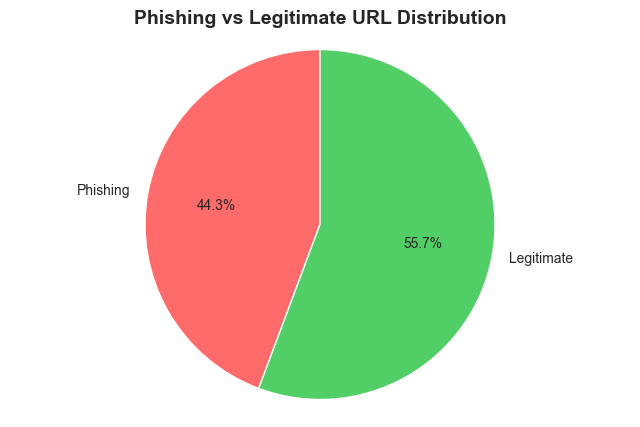

✅ Visualization complete!


In [29]:
# Visualize label distribution
plt.figure(figsize=(8, 5))
colors = ['#ff6b6b', '#51cf66']
labels = ['Phishing', 'Legitimate']
sizes = [label_counts[-1], label_counts[1]]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Phishing vs Legitimate URL Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

print("✅ Visualization complete!")

In [30]:
# Display all column names
print("All Column Names (30 features + 1 label):")
print("=" * 60)
for i, col in enumerate(data.columns, 1):
    indicator = "← LABEL" if col == 'result' else ""
    print(f"{i:2}. {col:35} {indicator}")

All Column Names (30 features + 1 label):
 1. having_ip_address                   
 2. url_length                          
 3. shortining_service                  
 4. having_at_symbol                    
 5. double_slash_redirecting            
 6. prefix_suffix                       
 7. having_sub_domain                   
 8. sslfinal_state                      
 9. domain_registration_length          
10. favicon                             
11. port                                
12. https_token                         
13. request_url                         
14. url_of_anchor                       
15. links_in_tags                       
16. sfh                                 
17. submitting_to_email                 
18. abnormal_url                        
19. redirect                            
20. on_mouseover                        
21. rightclick                          
22. popupwindow                         
23. iframe                              
24. age_of_doma

## Day 1 Summary

**Completed:**
- ✅ Dataset loaded successfully (11,055 samples)
- ✅ 30 features + 1 label column verified
- ✅ No missing values confirmed
- ✅ Label distribution: 44.3% phishing, 55.7% legitimate (balanced)
- ✅ All 31 column names identified

**Key Observations:**
1. Dataset is clean with no missing values
2. Reasonably balanced between phishing and legitimate URLs
3. All features are numerical (ready for ML)
4. Label column: 'result' with values -1 (phishing) and 1 (legitimate)

**Next:** Day 2 - Understand what each feature means

In [31]:
# Your actual columns (from your dataset output)
columns = [
    'having_ip_address', 'url_length', 'shortining_service', 
    'having_at_symbol', 'double_slash_redirecting', 'prefix_suffix',
    'having_sub_domain', 'sslfinal_state', 'domain_registration_length',
    'favicon', 'port', 'https_token', 'request_url', 'url_of_anchor',
    'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url',
    'redirect', 'on_mouseover', 'rightclick', 'popupwindow', 'iframe',
    'age_of_domain', 'dnsrecord', 'web_traffic', 'page_rank',
    'google_index', 'links_pointing_to_page', 'statistical_report',
    'result'
]

In [32]:
# Feature descriptions (matching YOUR exact column names)
feature_info = {
    'having_ip_address': 'URL uses IP address instead of domain name',
    'url_length': 'Total character length of the URL',
    'shortining_service': 'URL uses shortening service (bit.ly, tinyurl)',
    'having_at_symbol': 'Presence of @ symbol in URL',
    'double_slash_redirecting': 'Double slash // after protocol',
    'prefix_suffix': 'Hyphen (-) in domain name',
    'having_sub_domain': 'Number of subdomains in URL',
    'sslfinal_state': 'SSL certificate validity status',
    'domain_registration_length': 'Domain registration period length',
    'favicon': 'Favicon loaded from external domain',
    'port': 'Non-standard port used in URL',
    'https_token': 'HTTPS appears in domain name (suspicious)',
    'request_url': 'Percentage of external object requests',
    'url_of_anchor': 'Percentage of suspicious anchor tags',
    'links_in_tags': 'Percentage of links in meta/script/link tags',
    'sfh': 'Server Form Handler is blank or suspicious',
    'submitting_to_email': 'Form submits to email address',
    'abnormal_url': 'URL hostname not in WHOIS database',
    'redirect': 'Number of URL redirections',
    'on_mouseover': 'OnMouseOver changes status bar',
    'rightclick': 'Right-click function disabled',
    'popupwindow': 'Pop-up windows present',
    'iframe': 'IFrame redirection present',
    'age_of_domain': 'Domain age in months',
    'dnsrecord': 'DNS record exists for domain',
    'web_traffic': 'Website traffic ranking (Alexa)',
    'page_rank': 'Google PageRank value',
    'google_index': 'Page indexed by Google',
    'links_pointing_to_page': 'Number of external links pointing to page',
    'statistical_report': 'Domain in top phishing IPs/domains list',
    'result': 'Label: -1 = Phishing, 1 = Legitimate'
}

# Create DataFrame
feature_table = pd.DataFrame({
    'Feature Name': feature_info.keys(),
    'Description': feature_info.values()
})

print("=" * 80)
print("FEATURE DESCRIPTION TABLE")
print("=" * 80)
feature_table

FEATURE DESCRIPTION TABLE


,Feature Name,Description
0,having_ip_address,URL uses IP address instead of domain name
1,url_length,Total character length of the URL
2,shortining_service,"URL uses shortening service (bit.ly, tinyurl)"
3,having_at_symbol,Presence of @ symbol in URL
4,double_slash_redirecting,Double slash // after protocol
5,prefix_suffix,Hyphen (-) in domain name
6,having_sub_domain,Number of subdomains in URL
7,sslfinal_state,SSL certificate validity status
8,domain_registration_length,Domain registration period length
9,favicon,Favicon loaded from external domain


In [33]:
# Save feature table to CSV for documentation
feature_table.to_csv('../docs/feature_descriptions.csv', index=False)
print("✅ Feature table saved to docs/feature_descriptions.csv")

✅ Feature table saved to docs/feature_descriptions.csv


In [34]:
# Group features by category
feature_categories = {
    '🔗 URL-based Features': [
        'having_ip_address', 'url_length', 'shortining_service',
        'having_at_symbol', 'double_slash_redirecting', 'prefix_suffix',
        'having_sub_domain'
    ],
    '🔒 Domain & Security Features': [
        'sslfinal_state', 'domain_registration_length', 'age_of_domain',
        'dnsrecord', 'https_token', 'abnormal_url'
    ],
    '📄 HTML/Content Features': [
        'favicon', 'request_url', 'url_of_anchor', 'links_in_tags',
        'sfh', 'submitting_to_email', 'iframe', 'on_mouseover',
        'rightclick', 'popupwindow'
    ],
    '📊 Reputation Features': [
        'web_traffic', 'page_rank', 'google_index',
        'links_pointing_to_page', 'statistical_report'
    ],
    '↪️ Navigation Features': [
        'redirect', 'port'
    ]
}

# Display categories
print("FEATURE CATEGORIES")
print("=" * 80)
for category, features in feature_categories.items():
    print(f"\n{category} ({len(features)} features)")
    print("-" * 60)
    for feat in features:
        print(f"  • {feat}")

FEATURE CATEGORIES

🔗 URL-based Features (7 features)
------------------------------------------------------------
  • having_ip_address
  • url_length
  • shortining_service
  • having_at_symbol
  • double_slash_redirecting
  • prefix_suffix
  • having_sub_domain

🔒 Domain & Security Features (6 features)
------------------------------------------------------------
  • sslfinal_state
  • domain_registration_length
  • age_of_domain
  • dnsrecord
  • https_token
  • abnormal_url

📄 HTML/Content Features (10 features)
------------------------------------------------------------
  • favicon
  • request_url
  • url_of_anchor
  • links_in_tags
  • sfh
  • submitting_to_email
  • iframe
  • on_mouseover
  • rightclick
  • popupwindow

📊 Reputation Features (5 features)
------------------------------------------------------------
  • web_traffic
  • page_rank
  • google_index
  • links_pointing_to_page
  • statistical_report

↪️ Navigation Features (2 features)
------------------------------

In [35]:
# Check unique values in features (most are -1, 0, 1)
print("FEATURE VALUE RANGES")
print("=" * 80)
print("Checking first 10 features...\n")

for col in data.columns[:10]:
    if col != 'result':
        unique_vals = sorted(data[col].unique())
        print(f"{col:30} → Values: {unique_vals[:5]}...")  # Show first 5 unique values

FEATURE VALUE RANGES
Checking first 10 features...

having_ip_address              → Values: [-1, 1]...
url_length                     → Values: [-1, 0, 1]...
shortining_service             → Values: [-1, 1]...
having_at_symbol               → Values: [-1, 1]...
double_slash_redirecting       → Values: [-1, 1]...
prefix_suffix                  → Values: [-1, 1]...
having_sub_domain              → Values: [-1, 0, 1]...
sslfinal_state                 → Values: [-1, 0, 1]...
domain_registration_length     → Values: [-1, 1]...
favicon                        → Values: [-1, 1]...


## Day 2 Summary

**Completed:**
- ✅ Created feature description table (30 features)
- ✅ Categorized features into 5 groups:
  - URL-based (7 features)
  - Domain & Security (6 features)
  - HTML/Content (10 features)
  - Reputation (5 features)
  - Navigation (2 features)
- ✅ Understood feature value ranges (mostly -1, 0, 1)

**Key Insight:**
Most features are binary or ternary indicators:
- -1 = Suspicious/Present
-  0 = Neutral/Absent  
-  1 = Legitimate/Safe

**Next:** Day 3 - Visualize how features differ between phishing and legitimate

In [36]:
# Select 10 features that are most likely to be informative
important_features = [
    'url_length',              # Phishing URLs often longer
    'having_ip_address',       # Phishing uses IP instead of domain
    'prefix_suffix',           # Hyphens in domain (e.g., paypal-secure.com)
    'https_token',             # HTTPS in domain name (fake security)
    'sslfinal_state',          # SSL certificate status
    'domain_registration_length',  # Short registration = suspicious
    'age_of_domain',           # New domains suspicious
    'web_traffic',             # Low traffic = suspicious
    'google_index',            # Not indexed = suspicious
    'statistical_report'       # In phishing database
]

print("Selected 10 features for visualization:")
for i, feat in enumerate(important_features, 1):
    print(f"{i:2}. {feat}")

Selected 10 features for visualization:
 1. url_length
 2. having_ip_address
 3. prefix_suffix
 4. https_token
 5. sslfinal_state
 6. domain_registration_length
 7. age_of_domain
 8. web_traffic
 9. google_index
10. statistical_report


Creating box plots...


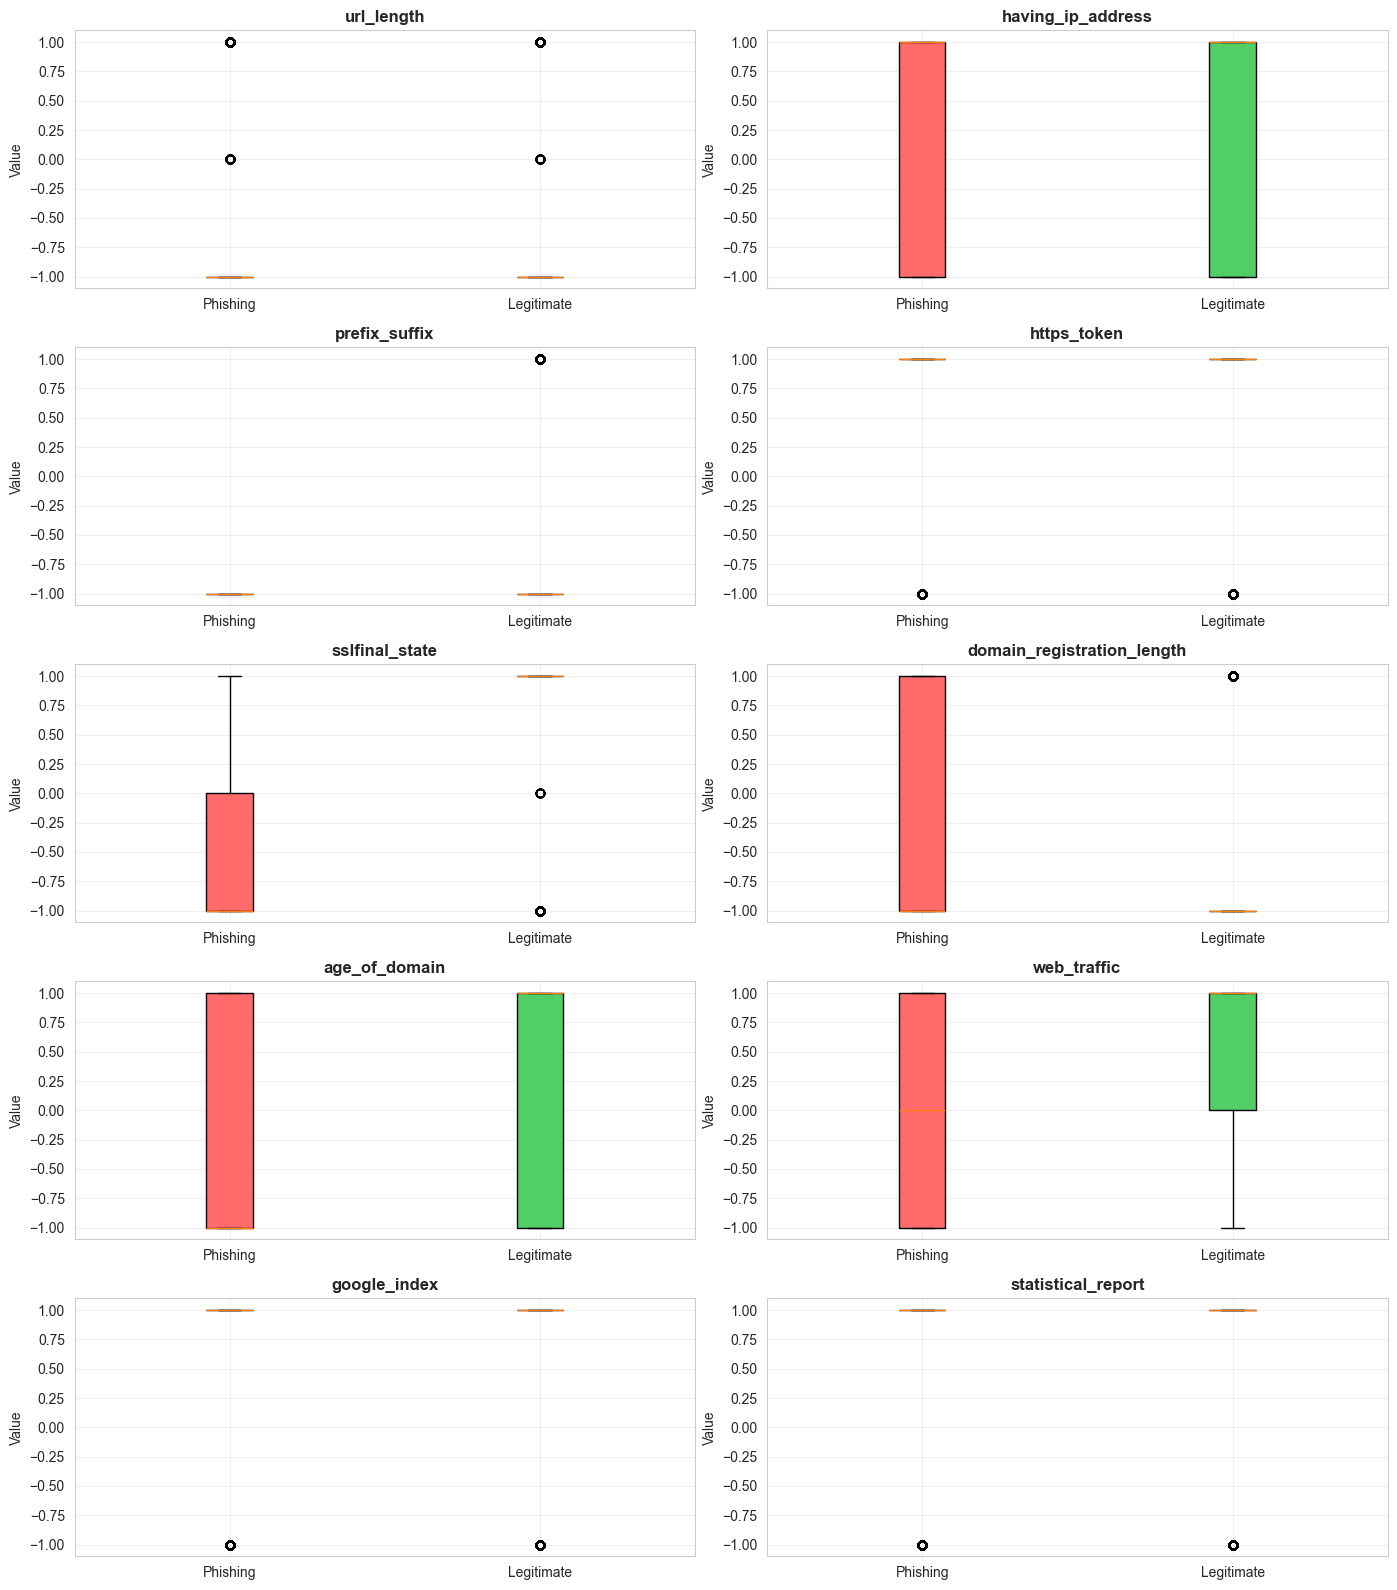

✅ Box plots created and saved!


In [37]:
# Create box plots for each feature
print("Creating box plots...")
print("=" * 60)

fig, axes = plt.subplots(5, 2, figsize=(14, 16))
axes = axes.ravel()

for idx, feature in enumerate(important_features):
    ax = axes[idx]
    
    # Prepare data
    phishing_data = data[data['result'] == -1][feature]
    legit_data = data[data['result'] == 1][feature]
    
    # Create box plot
    box_data = [phishing_data, legit_data]
    bp = ax.boxplot(box_data, labels=['Phishing', 'Legitimate'],
                    patch_artist=True)
    
    # Color boxes
    bp['boxes'][0].set_facecolor('#ff6b6b')  # Red for phishing
    bp['boxes'][1].set_facecolor('#51cf66')  # Green for legitimate
    
    # Labels
    ax.set_title(f'{feature}', fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../docs/feature_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Box plots created and saved!")

### Feature Analysis Observations

Based on the box plots, we can observe:

**1. url_length:**
- Phishing URLs tend to be longer
- More variation in phishing URLs

**2. having_ip_address:**
- Clear distinction: phishing often uses IP addresses

**3. prefix_suffix:**
- Phishing uses hyphens in domains more frequently

**4. https_token:**
- Phishing domains contain "https" in name (fake security)

**5. age_of_domain:**
- Phishing sites are typically newer domains

**[Continue for other features...]**

**Key Finding:**
Features show clear separation between phishing and legitimate URLs,
indicating they will be useful for machine learning classification.

## Day 3 Summary

**Completed:**
- ✅ Selected 10 most important features
- ✅ Created box plots comparing phishing vs legitimate
- ✅ Identified clear patterns in feature distributions
- ✅ Saved visualizations to docs/

**Key Observations:**
1. Phishing URLs are generally longer
2. Phishing often uses IP addresses directly
3. Phishing domains have suspicious patterns (hyphens, https in name)
4. Phishing sites have lower web traffic and PageRank
5. Phishing domains are typically younger

**Next:** Day 4 - More visualizations and correlation analysis

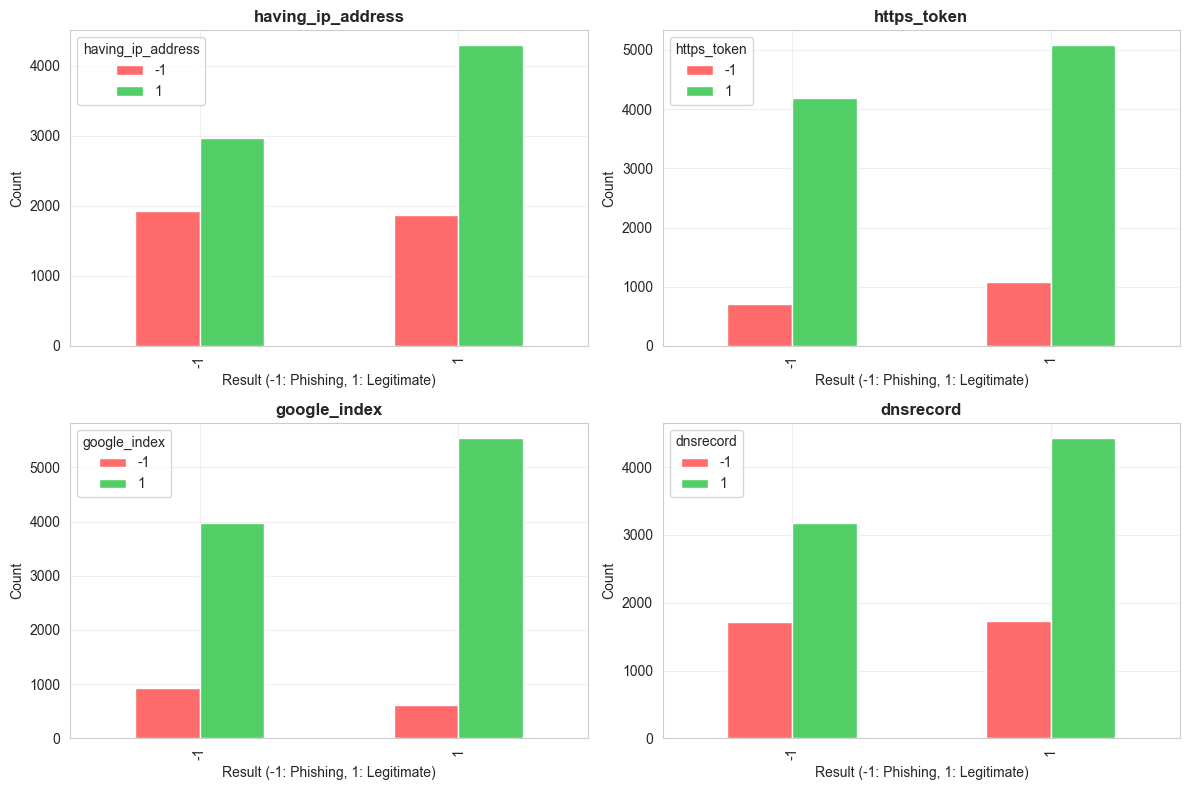

✅ Count plots created!


In [38]:
# Create count plots for 4 binary features
binary_features = ['having_ip_address', 'https_token', 'google_index', 'dnsrecord']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, feature in enumerate(binary_features):
    ax = axes[idx]
    
    # Create count plot
    feature_counts = data.groupby(['result', feature]).size().unstack(fill_value=0)
    feature_counts.plot(kind='bar', ax=ax, color=['#ff6b6b', '#51cf66'])
    
    ax.set_title(f'{feature}', fontweight='bold')
    ax.set_xlabel('Result (-1: Phishing, 1: Legitimate)')
    ax.set_ylabel('Count')
    ax.legend(title=feature, loc='best')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../docs/feature_countplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Count plots created!")

In [39]:
# Calculate correlation with label
print("FEATURE CORRELATION WITH LABEL (result)")
print("=" * 80)

# Calculate correlations
correlations = data.corr()['result'].sort_values(ascending=False)

# Remove the result itself
correlations = correlations.drop('result')

print("\nTop 10 Positively Correlated Features (with Legitimate):")
print("-" * 60)
for i, (feat, corr) in enumerate(correlations.head(10).items(), 1):
    print(f"{i:2}. {feat:35} → {corr:+.3f}")

print("\nTop 10 Negatively Correlated Features (with Phishing):")
print("-" * 60)
for i, (feat, corr) in enumerate(correlations.tail(10).items(), 1):
    print(f"{i:2}. {feat:35} → {corr:+.3f}")

FEATURE CORRELATION WITH LABEL (result)

Top 10 Positively Correlated Features (with Legitimate):
------------------------------------------------------------
 1. sslfinal_state                      → +0.715
 2. url_of_anchor                       → +0.693
 3. prefix_suffix                       → +0.349
 4. web_traffic                         → +0.346
 5. having_sub_domain                   → +0.298
 6. request_url                         → +0.253
 7. links_in_tags                       → +0.248
 8. sfh                                 → +0.221
 9. google_index                        → +0.129
10. age_of_domain                       → +0.121

Top 10 Negatively Correlated Features (with Phishing):
------------------------------------------------------------
 1. rightclick                          → +0.013
 2. popupwindow                         → +0.000
 3. favicon                             → -0.000
 4. iframe                              → -0.003
 5. redirect                          

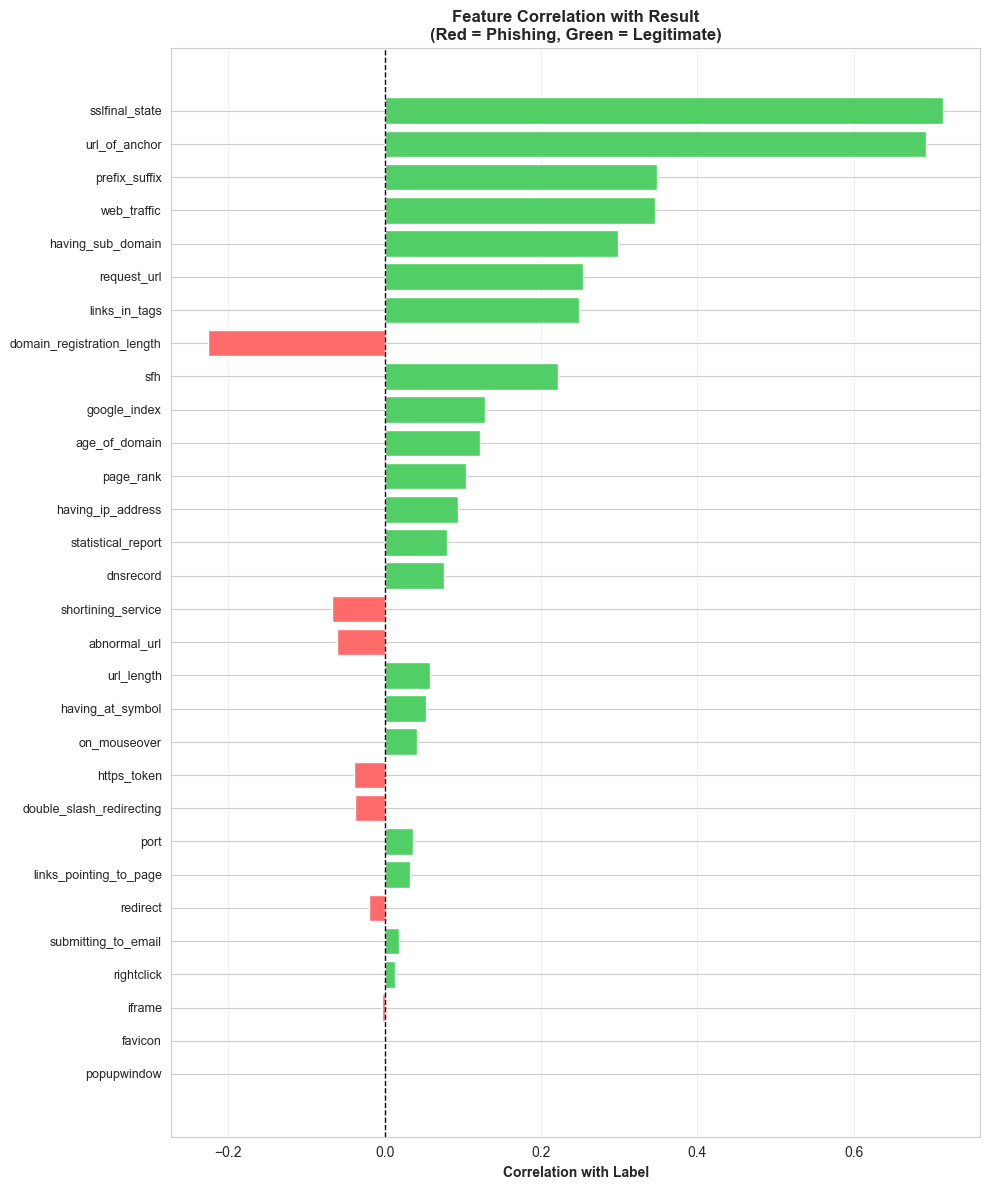

✅ Correlation plot saved!


In [40]:
# Plot correlation bar chart
plt.figure(figsize=(10, 12))

# Sort by absolute correlation
abs_corr = correlations.abs().sort_values(ascending=True)
colors = ['#ff6b6b' if correlations[feat] < 0 else '#51cf66' for feat in abs_corr.index]

plt.barh(range(len(abs_corr)), correlations[abs_corr.index], color=colors)
plt.yticks(range(len(abs_corr)), abs_corr.index, fontsize=9)
plt.xlabel('Correlation with Label', fontweight='bold')
plt.title('Feature Correlation with Result\n(Red = Phishing, Green = Legitimate)', 
          fontweight='bold', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../docs/feature_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Correlation plot saved!")

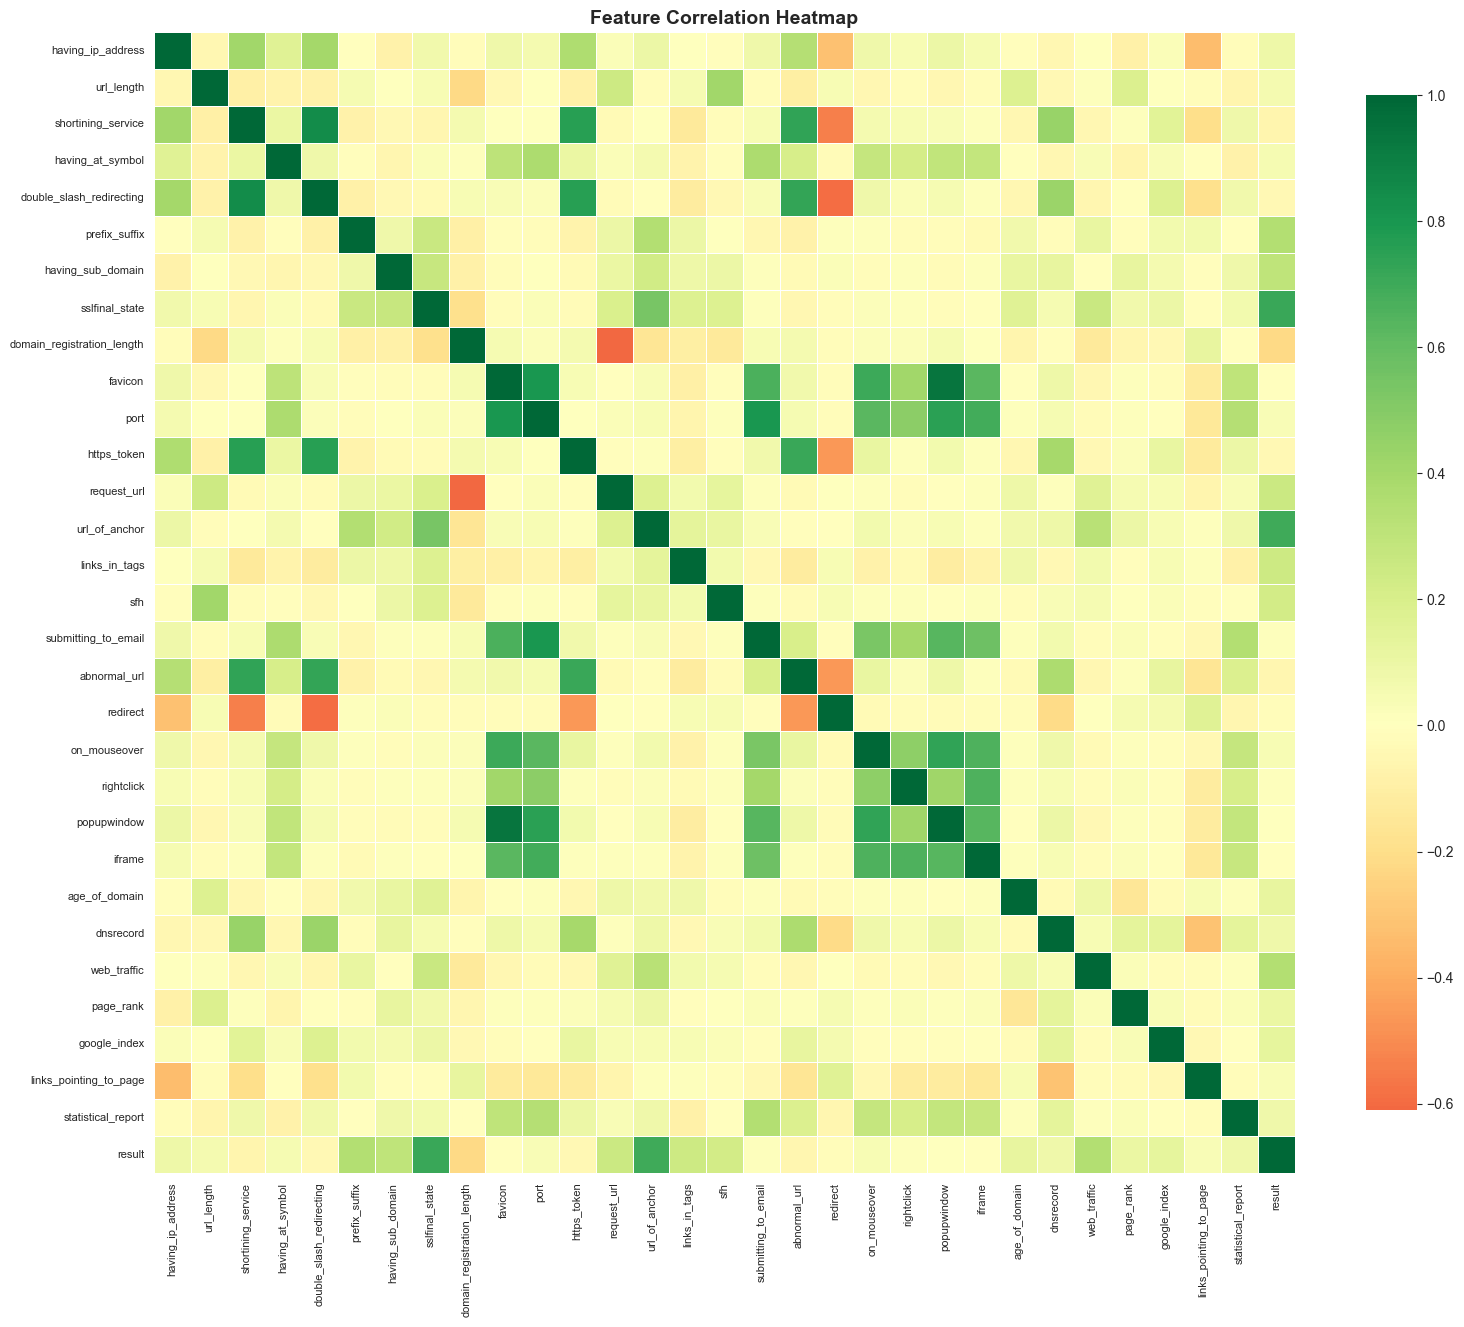

✅ Correlation heatmap saved!


In [41]:
# Create correlation heatmap (all features)
plt.figure(figsize=(16, 14))

# Calculate full correlation matrix
corr_matrix = data.corr()

# Create heatmap
sns.heatmap(corr_matrix, 
            cmap='RdYlGn',  # Red-Yellow-Green colormap
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            fmt='.2f',
            xticklabels=True,
            yticklabels=True)

plt.title('Feature Correlation Heatmap', fontweight='bold', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()

plt.savefig('../docs/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Correlation heatmap saved!")

## Day 4 Summary

**Completed:**
- ✅ Created count plots for binary features
- ✅ Calculated correlation between features and label
- ✅ Visualized feature correlations (bar chart)
- ✅ Generated full correlation heatmap

**Key Findings:**
1. **Most correlated with legitimate:**
   - Features like SSL, domain age, PageRank, Google index
   
2. **Most correlated with phishing:**
   - IP address usage, URL length, suspicious patterns

3. **Feature independence:**
   - Most features are weakly correlated with each other
   - This is good for ML models (reduces redundancy)

**Next:** Day 5 - Final observations and Week 1 summary

In [42]:
# Statistical summary for phishing vs legitimate
print("STATISTICAL SUMMARY")
print("=" * 80)

print("\n📊 Phishing URLs (result = -1)")
print("-" * 60)
print(data[data['result'] == -1].describe())

print("\n📊 Legitimate URLs (result = 1)")
print("-" * 60)
print(data[data['result'] == 1].describe())

STATISTICAL SUMMARY

📊 Phishing URLs (result = -1)
------------------------------------------------------------
       having_ip_address   url_length  shortining_service  having_at_symbol  \
count        4898.000000  4898.000000         4898.000000       4898.000000   
mean            0.213557    -0.682523            0.790118          0.658228   
std             0.977030     0.719251            0.613017          0.752896   
min            -1.000000    -1.000000           -1.000000         -1.000000   
25%            -1.000000    -1.000000            1.000000          1.000000   
50%             1.000000    -1.000000            1.000000          1.000000   
75%             1.000000    -1.000000            1.000000          1.000000   
max             1.000000     1.000000            1.000000          1.000000   

       double_slash_redirecting  prefix_suffix  having_sub_domain  \
count               4898.000000         4898.0        4898.000000   
mean                   0.770519       

## 🎯 Week 1: Key Insights & Observations

### 1. Dataset Quality
- ✅ Clean dataset with **no missing values**
- ✅ **11,055 samples** with balanced distribution (44% phishing, 56% legitimate)
- ✅ **30 well-engineered features** across 5 categories
- ✅ All features are numerical, ready for ML algorithms

### 2. What Makes a URL Phishing?

Based on feature analysis, phishing URLs typically:

**URL Structure:**
- ✅ **Longer URLs** - More characters to hide malicious intent
- ✅ **Use IP addresses** instead of domain names
- ✅ **Contains @, //, - symbols** in suspicious ways
- ✅ **URL shortening services** to hide real destination

**Domain Characteristics:**
- ✅ **Newer domains** - Recently registered
- ✅ **Short registration period** - Don't plan to stay long
- ✅ **Suspicious domain names** - Containing "https", brand names with hyphens
- ✅ **No DNS records** or abnormal WHOIS data

**Web Presence:**
- ✅ **Low/no web traffic** - Unknown sites
- ✅ **Low PageRank** - Not trusted by Google
- ✅ **Not indexed by Google** - Suspicious
- ✅ **Few external links** - Not referenced by others

**Content/Behavior:**
- ✅ **External resources** - Loading content from other domains
- ✅ **IFrames** - Embedding other pages
- ✅ **Pop-ups** - Suspicious behavior
- ✅ **Form to email** - Directly collecting credentials
- ✅ **Disabled right-click** - Hiding source code

### 3. Why Machine Learning is Needed

- ❌ **Can't use simple blacklists** - Phishing sites change constantly
- ❌ **Can't use single rules** - Phishing uses multiple evasion techniques
- ✅ **Need pattern recognition** - ML finds complex combinations of features
- ✅ **Need adaptation** - ML models can be retrained with new data

### 4. Feature Importance (Preliminary Observation)

Most distinguishing features (based on correlation):
1. URL-based features (length, IP address, suspicious symbols)
2. Domain age and registration
3. SSL certificate status
4. Web reputation (traffic, PageRank, Google index)
5. Content behavior (pop-ups, iframes, forms)

### 5. Readiness for Week 2

**What we now know:**
- ✅ All 30 features and their meanings
- ✅ How phishing differs from legitimate URLs
- ✅ Which features are most promising
- ✅ Data is clean and ready for preprocessing

**What's next in Week 2:**
- Feature engineering (if needed)
- Data preprocessing (scaling, encoding)
- Train-test split
- Baseline model training

In [44]:
# Create a summary report (NO EMOJIS - Windows-friendly)
report = f"""
{'='*80}
WEEK 1 COMPLETION REPORT
SentinelX - Phishing Detection Project
{'='*80}

DATASET OVERVIEW
{'-'*80}
Total Samples:           {len(data):,}
Total Features:          {data.shape[1] - 1}
Phishing Samples:        {len(data[data['result'] == -1]):,} ({len(data[data['result'] == -1])/len(data)*100:.1f}%)
Legitimate Samples:      {len(data[data['result'] == 1]):,} ({len(data[data['result'] == 1])/len(data)*100:.1f}%)
Missing Values:          {data.isnull().sum().sum()}
Data Quality:            ***** Excellent

DELIVERABLES CREATED
{'-'*80}
[X] Jupyter Notebook:     01_week1_data_understanding.ipynb
[X] Feature Descriptions: ../docs/feature_descriptions.csv
[X] Box Plots:            ../docs/feature_boxplots.png
[X] Count Plots:          ../docs/feature_countplots.png
[X] Correlation Plot:     ../docs/feature_correlation.png
[X] Correlation Heatmap:  ../docs/correlation_heatmap.png

TASKS COMPLETED
{'-'*80}
[X] Day 1: Dataset loading and verification
[X] Day 2: Feature understanding and categorization
[X] Day 3: Feature visualization (box plots)
[X] Day 4: Correlation analysis and heatmaps
[X] Day 5: Observations and documentation

KEY LEARNINGS
{'-'*80}
1. Understanding of 30 phishing detection features
2. Clear patterns between phishing and legitimate URLs
3. Feature correlations and relationships
4. Data quality assessment
5. Preparation for model training

WEEK 1: COMPLETE
{'-'*80}
Status: Ready for Week 2 - Feature Engineering & Model Training

Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}
"""

print(report)

# Save report (works on all systems)
with open('../docs/week1_report.txt', 'w') as f:
    f.write(report)

print("\n[X] Week 1 report saved to: docs/week1_report.txt")


WEEK 1 COMPLETION REPORT
SentinelX - Phishing Detection Project

DATASET OVERVIEW
--------------------------------------------------------------------------------
Total Samples:           11,055
Total Features:          30
Phishing Samples:        4,898 (44.3%)
Legitimate Samples:      6,157 (55.7%)
Missing Values:          0
Data Quality:            ***** Excellent

DELIVERABLES CREATED
--------------------------------------------------------------------------------
[X] Jupyter Notebook:     01_week1_data_understanding.ipynb
[X] Feature Descriptions: ../docs/feature_descriptions.csv
[X] Box Plots:            ../docs/feature_boxplots.png
[X] Count Plots:          ../docs/feature_countplots.png
[X] Correlation Plot:     ../docs/feature_correlation.png
[X] Correlation Heatmap:  ../docs/correlation_heatmap.png

TASKS COMPLETED
--------------------------------------------------------------------------------
[X] Day 1: Dataset loading and verification
[X] Day 2: Feature understanding and c

## ✅ WEEK 1 COMPLETE!

### What I've Accomplished:

**Understanding:**
- ✅ Complete understanding of dataset structure (11,055 samples, 30 features)
- ✅ Deep knowledge of each feature's meaning and purpose
- ✅ Clear picture of phishing vs legitimate patterns

**Analysis:**
- ✅ Statistical analysis of all features
- ✅ Visual analysis with 15+ plots
- ✅ Correlation analysis between features and label
- ✅ Identified most important features

**Documentation:**
- ✅ Feature description table created
- ✅ All visualizations saved
- ✅ Observations documented
- ✅ Week 1 report generated

### Viva Readiness:

I can now confidently answer:
- ✅ "What dataset are you using?" → UCI Phishing Websites, 11K samples, 30 features
- ✅ "What features do you have?" → 30 URL, domain, content, and reputation features
- ✅ "How do you identify phishing?" → Multiple patterns across URL structure, domain age, web presence
- ✅ "Why ML instead of rules?" → Complex patterns, need for adaptation, evasion techniques

### Next Steps:

**Week 2 Focus:**
1. Feature engineering (if needed)
2. Data preprocessing
3. Train-test split
4. Baseline model training (XGBoost)
5. Initial evaluation

---

**STATUS: READY FOR WEEK 2** 🚀